In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as unkind_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from numbers import Number


fifa_file = pd.read_csv('fifa21_train.csv') 
# dropped_joined_loan_date = False
# dropped_id_name = False
# dropped_other_cols = False

###
### Exploring

In [2]:
fifa_file.shape

(11701, 101)

In [3]:
pd.set_option('max_columns',150)
fifa_file.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
pd.set_option('display.max_rows', None)
display(fifa_file.describe().T)
pd.set_option('display.max_rows', 10)

,count,mean,std,min,25%,50%,75%,max
ID,11701.0,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Age,11701.0,25.270490,4.957640,16.0,21.0,25.0,29.0,43.0
Growth,11701.0,5.534655,5.810903,-1.0,0.0,4.0,10.0,26.0
Attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
Crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
Finishing,11701.0,48.048116,19.399617,3.0,33.0,52.0,64.0,95.0
Heading Accuracy,11701.0,53.494060,16.956195,5.0,46.0,56.0,65.0,93.0
Short Passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
Volleys,11660.0,45.067324,17.732902,4.0,32.0,47.0,59.0,90.0
Skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0


In [5]:
# check = clean_df[['w/f','sm','ir','a/w','d/w']]
# check.head()

# check.nunique()

# check['d/w'].unique()

# w/f values : ['4 ★', '3 ★', '2 ★', '5 ★', '1 ★']
# sm : ['2★', '4★', '3★', '1★', '5★']
# ir: ['1 ★', '2 ★', '3 ★', '5 ★', '4 ★']
# a/w: ['High', 'Medium', 'Low', nan]
# d/w: ['Medium', 'Low', 'High', nan]

#### Check nulls

In [6]:
summary = pd.concat([fifa_file.isna().sum(), round(fifa_file.isna().sum()/len(fifa_file),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
summary
pd.set_option('display.max_rows', None)
display(summary[summary['Null Volumes']>0])
pd.set_option('display.max_rows', 20)

# drop loan_date_end
summary[summary['Null Volumes']>0].index

,Null Volumes,Null %
Club,18,0.15
Position,288,2.46
Joined,41,0.35
Loan Date End,11072,94.62
Volleys,41,0.35
Curve,41,0.35
Agility,41,0.35
Balance,41,0.35
Jumping,41,0.35
Interceptions,7,0.06


Index(['Club', 'Position', 'Joined', 'Loan Date End', 'Volleys', 'Curve',
       'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning',
       'Vision', 'Composure', 'Sliding Tackle', 'A/W', 'D/W'],
      dtype='object')

###
### Preprocessing Functions

In [7]:
def prep_headings(my_df, columns_that_should_be_dates):
    # remove Unnamed: 0
    # my_df = my_df.drop(columns=['Unnamed: 0'])

    # drop to lower case
    my_df.columns = list(map(lambda x:x.lower(),my_df.columns))

    # replace spaces with _
    my_df.columns = list(map(lambda x:x.replace(' ','_'),my_df.columns))

    # set 'effective_to_date' to date type
    my_df[columns_that_should_be_dates] = pd.to_datetime(my_df[columns_that_should_be_dates])
    
    return my_df

def height_to_cm(height_in_feet):
    height_in_feet = height_in_feet.replace('"','') # remove the " symbol
    split_string = height_in_feet.split("'",1) # split the string on the ' symbol
    height_in_inchest = float(split_string[0]) * 12
    height_in_inchest += float(split_string[1])
    height_in_cm = round(height_in_inchest * 2.54,1) # not really needed but go metric
    return height_in_cm

def show_me_the_money(money_string):
    
    money_string = money_string[1:]
    unit = money_string[-1]
    
    if unit == '0':
        return int(money_string)
    else:
        money_string = float(money_string[:-1])
    
    if unit == 'K':
        money_string = money_string * 1000
    elif unit == 'M':
        money_string = money_string * 1000000
    elif unit == 'B':
        money_string = money_string * 1000000000
        
    return int(money_string)


def to_units(x):
    
    unit = x[-1]
    
    if unit in ['0','1','2','3','4','5','6','7','8','9']:
        return int(x)
    else:
        x = float(x[:-1])
    
    if unit == 'K':
        x = x * 1000
    elif unit == 'M':
        x = x * 1000000
    elif unit == 'B':
        x = x * 1000000000
        
    return int(x)

def score(text):
      
    if "+" in text:
        test = text.split('+',1)
        score = float(test[0])
        return score
    else:
        return text

      
def add_score(text):

    if "+" in text:
        test = text.split('+',1)
        score = float(test[0]) + float(test[1])
        return score
    else:
        return text


###
### Preprocessing

In [90]:
def preprocessing(dirty_data):

    global dropped_joined_loan_date
    global dropped_id_name
    global dropped_other_cols
    
    dirty_data = prep_headings(dirty_data, 'joined') # not sure if this will handle joined correctly


    dirty_data['height'] = dirty_data['height'].apply(height_to_cm)

    dirty_data['weight'] = list(map(lambda x:int(x.strip('lbs')),dirty_data['weight']))  # strip lbs and convert to int

    for col in ['value','wage','release_clause']:
        dirty_data[col] = dirty_data[col].apply(show_me_the_money)

    dirty_data['hits'] = dirty_data['hits'].apply(to_units)

    wf_dic = {'4 ★' : 4, '3 ★' : 3, '2 ★' : 2, '5 ★' : 5, '1 ★' :1}
    sm_dic = {'4★' : 4, '3★' : 3, '2★' : 2, '5★' : 5, '1★' :1}
    ir_dic = {'4 ★' : 4, '3 ★' : 3, '2 ★' : 2, '5 ★' : 5, '1 ★' :1}
    aw_dic = {'High' : 3, 'Medium' : 2, 'Low' : 1}
    dw_dic = {'High' : 3, 'Medium' : 2, 'Low' : 1}

    dirty_data['w/f'] = dirty_data['w/f'].map(wf_dic)
    dirty_data['sm'] = dirty_data['sm'].map(sm_dic)
    dirty_data['ir'] = dirty_data['ir'].map(ir_dic)
    dirty_data['a/w'] = dirty_data['a/w'].map(aw_dic)
    dirty_data['d/w'] = dirty_data['d/w'].map(dw_dic)

    #dirty_data['a/w'] = pd.to_numeric(dirty_data['a/w'])
    #dirty_data['d/w'] = pd.to_numeric(dirty_data['d/w'])
    
    # dropping columns that have pretty unique values & not sure best way to handled dates...consider converting to number for model testing?
    if dropped_joined_loan_date == False:
        dirty_data = dirty_data.drop(['joined','loan_date_end'],axis=1)
        dropped_joined_loan_date = True
    
    # Deciding which categoricals to keep

    # dropping categorical type columns that have unique values
    if dropped_id_name == False:
        dirty_data = dirty_data.drop(['id','name'],axis=1)       
        dropped_id_name = True

    # dropping columns with many categorical values...
    # testing - lets also drop age, height, weight, foot, growth, value, wage, release_clause...ok, when we do this we no longer get crazy results with the validation data
    #          is it a specific column or number of columns....let's try reincluding and see when it goes bad again - with release clause validation goes crazy...
    # issue resolved: was refitting for scaling..no longer doing this and predictions are now resonable
    #          however, when we reintroduce age or wage for example our r2 test increases but our r2/mse validation goes crazy still
    if dropped_other_cols == False:
        dirty_data = dirty_data.drop(['nationality','club','position','team_&_contract','contract','age'],axis=1)
        #dirty_data = dirty_data.drop(['age','growth','height','weight','value','wage','release_clause'],axis=1)
        dropped_other_cols = True


    # handle remaining nulls
    
    #dirty_data['club'] = dirty_data['club'].fillna("Unknown")
    #dirty_data['position'] = dirty_data['position'].fillna("Unknown")
    
    summary = pd.concat([dirty_data.isna().sum(), round(dirty_data.isna().sum()/len(dirty_data),4)*100 ],axis=1)
    summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
       
    # print(list(summary[summary['Null Volumes']>0].index)) # these are the columns that have nulls in them
    #for c in summary[summary['Null Volumes']>0].index:
    #    print(c)
     
    # drop rows containing nulls (['volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle', 'a/w', 'd/w'])
    #for c in summary[summary['Null Volumes']>0].index:
    #    dirty_data = dirty_data.dropna(c,inplace=True)
    
    dirty_data = dirty_data.dropna(subset=list(summary[summary['Null Volumes']>0].index),inplace=False) # inplace=true just skips need to assign it...
    dirty_data = dirty_data.reset_index() # we need to rebuild index after dropping rows...
       
    # sets NaNs to mean - seems reasonable but validation results going wack and it's due to predictions on rows where the mean has been set  
    #for c in summary[summary['Null Volumes']>0].index:
    #    dirty_data[c] = dirty_data[c].fillna(dirty_data[c].mean())
    
    
    #temp = dirty_data[['a/w','d/w','sm']]
    #temp.dtypes
    #summary[summary['Null Volumes']>0].index
    
    
    for_scoring = dirty_data.select_dtypes(include=object).copy() # to parse over categoricals
    # for_scoring = for_scoring.drop(['club', 'position'],axis=1) # we don't want to parse these anyway and currently have nulls which throw errors, already dropped in preprocessing 

    for col in for_scoring.columns:
         dirty_data[col] = dirty_data[col].apply(add_score)
    
    return dirty_data # well, this is clean-ish now

dirty_data = fifa_file.copy()
dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
first_run = True
dirty_data = prep_headings(dirty_data,'joined')
freshly_cleaned_data = preprocessing(dirty_data)
freshly_cleaned_data.shape
# summary = pd.concat([freshly_cleaned_data.isna().sum(), round(freshly_cleaned_data.isna().sum()/len(freshly_cleaned_data),4)*100 ],axis=1)
# summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
# summary.T


(11422, 92)

In [9]:
# pd.set_option('display.max_rows', None)
# display(data['hits'].value_counts())
# pd.set_option('display.max_rows', 20)

In [10]:
# pd.set_option('display.max_rows', None)
# display(data.dtypes)
# pd.set_option('display.max_rows', 20)

In [11]:
freshly_cleaned_data.shape

(11422, 86)

In [12]:
freshly_cleaned_data.head()

,age,bp,foot,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,CM,Right,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,3.0,2.0,1,69,51,63,63,51,60,3,59.0,59.0,59.0,61.0,62.0,62.0,62.0,61.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,60.0,60.0,60.0,60.0,60.0,59.0,55.0,55.0,55.0,59.0,16.0,64
1,30,ST,Right,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,3.0,1.0,2,83,75,68,82,33,71,44,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,70.0,70.0,70.0,77.0,59.0,55.0,55.0,55.0,59.0,55.0,50.0,50.0,50.0,55.0,20.0,77
2,33,CAM,Right,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,3.0,2.0,2,80,77,78,86,27,56,73,75.0,75.0,75.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,80.0,76.0,76.0,76.0,80.0,61.0,58.0,58.0,58.0,61.0,55.0,43.0,43.0,43.0,55.0,14.0,80
3,22,CDM,Right,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,2.0,2.0,1,57,44,54,57,57,60,7,52.0,52.0,52.0,51.0,51.0,51.0,51.0,51.0,55.0,55.0,55.0,55.0,58.0,58.0,58.0,55.0,58.0,60.0,60.0,60.0,58.0,59.0,60.0,60.0,60.0,59.0,16.0,59
4,23,CDM,Right,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1.0,2.0,1,66,44,60,64,60,66,4,58.0,58.0,58.0,59.0,59.0,59.0,59.0,59.0,63.0,63.0,63.0,64.0,65.0,65.0,65.0,64.0,66.0,66.0,66.0,66.0,66.0,65.0,63.0,63.0,63.0,65.0,17.0,65


###
### Model the data

#####
##### process functions

###### Implemented function names:

* correlation_pair_check
* filter_numerical_features
* encode_my_shizzle
* scaling_101_for_reptiles
* choo_choo_train_model
* apply_ordinals

###### Potential functions:

* using log scales to normalize data and combining with standard scaling

In [67]:
# potential process functions & now with some actual process functions

# correlation pair check
# description:   using a numerical data frame provides correlations between them
# input:         df with 2 numerical columns
# output:        correlation_value / P
# process:       take first column and use stats.pearsonr to get P value.

def correlation_pair_check(df):
    # does df have two columns, if not return error/create exception or whatevers
    y = df.iloc[:,0]
    X = df.iloc[:,1]
    #print(round(stats.pearsonr(X, y)[0],2))
    return stats.pearsonr(X, y)[0]

# select numerical features
# description:   drop columns that have low correlation to target or very high correlation with each other
# input:         df, target, min_correlation_with_target=0.1?, max_correlation_with_other_feature=0.9?
# options:       keep_target (drop or keep target in output)
# output:        df
# process:       pull numericals, check correlation against target, check correlation of features against each other, filter based on min/max values provided, return filtered df

def filter_numerical_features(df, target, min_correlation_with_target=0.1, max_correlation_with_other_feature=0.9):
    # exclude target from features
    features = df.drop(target, axis=1)
    # split our categoricals and numericals ?? other too i guess
    numerical_features = features.select_dtypes(include=np.number)
    categorical_features = features.select_dtypes(include=object)
    other_features = features.select_dtypes(exclude=(np.number, object))
    
    # for each column in numerical features, check against target and keep if suitable
    to_keep = []
    
    for col in numerical_features.columns:
        if abs(stats.pearsonr(numerical_features[col], df[target])[0]) > min_correlation_with_target:
            to_keep.append(col)
    
    numerical_features = numerical_features[to_keep]
    
    # for each column in numerical features, check against each other exclude *redundant columns* /// highly corretable        
    i = 1
    for col in numerical_features.columns: # loop each column
        for col2 in numerical_features.iloc[:,i:].columns: # no need to check self or prior columns x.y = y.x
            i = i + 1
            if abs(stats.pearsonr(numerical_features[col], numerical_features[col2])[0]) >= max_correlation_with_other_feature:
                to_keep.remove(col2)
    
    numerical_features = numerical_features[to_keep]
    
    return pd.concat([numerical_features, categorical_features, other_features, df[target]],axis=1), to_keep

# filters numerical columns listed, maintains the categorical columns
def filter_numerical_columns(df, target, cols):
    # exclude target from features
    features = df.drop(target, axis=1)
    # split our categoricals and numericals ?? other too i guess
    numerical_features = features[cols]
    categorical_features = features.select_dtypes(include=object)
    other_features = features.select_dtypes(exclude=(np.number, object))
        
    return pd.concat([numerical_features, categorical_features, other_features, df[target]],axis=1)




# select categorical features
# description:   drop columns that have lots of categories - perhaps later also create 'other' when suitable
# input:         df, category_limit
# output:        df
# process:       pull categoricals, check number of unique (nunique) if over limit filter them, return filtered df

# not implemented - just going to manually drop customer id and date

# encoding (for categoricals but handle in function)
# description:    applies encoding methods to categorical data depending on provided column lists for each method
# input:          df, ?target?, onehotcategoricals, labelcategoricals, labelcategoricals_datadictionary??
# output          df
# process:pull categoricals, split into ones for onehot and ones for label encoding, bring back into data

# altered: just one shot encoding - ordinal encoding handled in different function
def encode_my_shizzle(df, categoricals_for_onehot):
    
    display("Shape going into encode: " + str(df.shape))
    
    categoricals_onehot = df[categoricals_for_onehot]
    #categoricals_ordinal = df[categoricals_for_ordinal]
    
    display("Categoricals oneshot" + str(categoricals_onehot.shape))
    
    # encode and transform desired columns, dropping first category for each column
    encoder = OneHotEncoder(drop='first').fit(categoricals_onehot)
    #encoder = OneHotEncoder().fit(categoricals_onehot)
    encoded = encoder.transform(categoricals_onehot).toarray()
    
    categoricals_onehot = pd.DataFrame(encoded)
    
    display("Categoricals oneshot after encode" + str(categoricals_onehot.shape))
    
    # minor fix - reuse categorical names rather than dummy ones - encoder.categories_
    for col in categoricals_onehot.columns:
        if isinstance(col, (int, float)):
            #print(str(col) + ' is a number')
            categoricals_onehot = categoricals_onehot.rename(columns={col : "Faker" + str(col)})

    display("Categoricals oneshot renaming cols" + str(categoricals_onehot.shape))
            
    # drop original columns from df and replace with encoded ones
    df = df.drop(list(categoricals_for_onehot), axis=1)
    
    display("Dropping categoricals from df, df:" + str(df.shape))
    display("Dropping categoricals from df, categoricals" + str(categoricals_onehot.shape))
    
    df = pd.concat([df,categoricals_onehot], axis=1)
    
    display("Adding encoded categorics to df" + str(df.shape))
    
    # depericated: labelEncoder
    #categoricals_ordinal = categoricals_ordinal.apply(LabelEncoder().fit_transform)
    
    display("Shape coming out of encode: " + str(df.shape))
    
    return df

# log stuff to normalise for use with standardscaler ???

# scaling (for numericals but handle in function)
# description:    applies scaling methods to numerical data depending on provided column lists for each method
# input:          df, ?target?, minmaxscaler_numericals, standardscaler_numericals
# output:         df
# process: pull numericals, drop target, split into ones for minmax and ones for standard, apply appropriate scaling to each, bring both back into data

def scaling_101_for_reptiles(model_type, df, target, t_index, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[], refit=True):
    
    target_column = df[target]
    df = df.drop([target], axis=1)
    
    # min_max_scaler
    if len(numericals_for_minmaxscaler) > 0:
        minmaxscaler_numericals = df[numericals_for_minmaxscaler]    

        X = minmaxscaler_numericals
        if refit:
            minmaxtransformer[model_type].append(MinMaxScaler().fit(X))
        x_normalized = minmaxtransformer[model_type][t_index].transform(X)
        minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(numericals_for_minmaxscaler, axis=1)
        df = pd.concat([df,minmaxscaled],axis=1)

    # standard_scaler
    if len(numericals_for_starndardscaler) > 0:
        standardscaler_numericals = df[numericals_for_starndardscaler]

        X = standardscaler_numericals
        if refit:
            standardtransformer[model_type].append(StandardScaler().fit(X))
        x_standardized = standardtransformer[model_type][t_index].transform(X)
        x_standardized = pd.DataFrame(x_standardized,columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(standardscaler_numericals, axis=1)
        df = pd.concat([df,x_standardized],axis=1)
    
    df = pd.concat([df, target_column], axis=1)
    return df


# train model
def choo_choo_train_model(model_type, df, target, model_name, description, size_of_test=0.2, seed=42, putout=False):
    y = df[target]
    X = df.drop([target], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_of_test, random_state=seed)

    #create and train model "i" is global
    lm = linear_model.LinearRegression()
    models[model_type].append(lm.fit(X_train,y_train))
    
    predictions_train = models[model_type][i[model_type]].predict(X_train)
    predictions_test = models[model_type][i[model_type]].predict(X_test)
       
    # show performance
    if putout:
        print('*** '+description+' ***')
        print('Training/Test: ' + str((1-size_of_test)*100) + '% / ' + str(size_of_test*100) +'%')
        print('Random State:  ' + str(seed))
        print('--- training data ---')
        print('R2:   ' + str(r2_score(y_train, predictions_train)))
        print()
        print('--- test data ---')
        print('R2:       ' + str(r2_score(y_test, predictions_test)))
        print('MSE:      ' + str(unkind_squared_error(y_test,predictions_test)))
        print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(y_test,predictions_test))))
    
    #return [r2_score(y_train, predictions_train),r2_score(y_test, predictions_test),np.sqrt(unkind_squared_error(y_test,predictions_test))]
    return [model_name, model_type, i[0], description,size_of_test*100,seed,r2_score(y_train, predictions_train),r2_score(y_test, predictions_test),np.sqrt(unkind_squared_error(y_test,predictions_test))], models[model_type][i[model_type]]


# store results


def apply_ordinals(df, cols):

    available = ['location_code','coverage']    
    for col in cols:
        if col not in available:
            print('No ordinals applied - unhandled column provided, only location_code and/or coverage currently')
            return df
    
    coverage_dic = {'Basic' : 1, 'Extended' : 2, 'Premium' : 3}
    location_code_dic = {'Rural' : 1, 'Urban' : 2, 'Suburban' : 3}
    
    for col in cols:
        if col == 'coverage':
            df[col] = df[col].map(coverage_dic)
        if col == 'location_code':
            df[col] = df[col].map(location_code_dic)
    
    return df

    

##### Train and test the model

(11422, 92)

Index(['bp', 'foot'], dtype='object')


'Shape going into encode: (11422, 83)'

'Categoricals oneshot(11422, 2)'

'Categoricals oneshot after encode(11422, 15)'

'Categoricals oneshot renaming cols(11422, 15)'

'Dropping categoricals from df, df:(11422, 81)'

'Dropping categoricals from df, categoricals(11422, 15)'

'Adding encoded categorics to df(11422, 96)'

'Shape coming out of encode: (11422, 96)'

,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,Faker0,Faker1,Faker2,Faker3,Faker4,Faker5,Faker6,Faker7,Faker8,Faker9,Faker10,Faker11,Faker12,Faker13,Faker14
Null Volumes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(11422, 96)

(11422, 96)

,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Faker0,Faker1,Faker2,Faker3,Faker4,Faker5,Faker6,Faker7,Faker8,Faker9,Faker10,Faker11,Faker12,Faker13,Faker14,ova
Null Volumes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Name,Model Type,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,0,True baseline - taking score not add score,80.0,24,0.926185,0.917521,1.967728,0.1,0.9
1,Baseline,0,0,True baseline - taking score not add score,80.0,24,0.927825,0.919381,1.945411,0.1,0.9


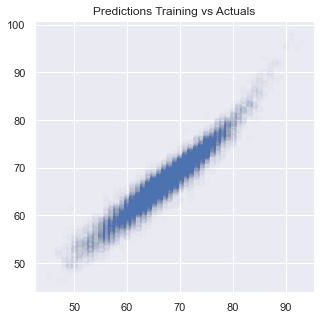

In [91]:
## cleaned_data from preprocessing
if first_run:
    global i
    i = [0,0,0]
    global models
    models = [[],[],[]] # [0 = 'main', 1 = 'cheeky', 2 = 'cheat']
    #global lm
    #lm = []
    first_run = False
    global team_awesome_model
    team_awesome_model = []
    global minmaxtransformer
    minmaxtransformer = [[],[],[]]
    global standardtransformer
    standardtransformer = [[],[],[]]
    results = pd.DataFrame(columns=['Name','Model Type','Model Index','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Baseline'
desc = 'True baseline - taking score not add score'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.80
#size_of_test=0.35

cleaned_data = freshly_cleaned_data.copy()
display(cleaned_data.shape)
#maybe training and validation categoricals are getting a different column order but it's hidden due to the faker nameing : and although it might be an issue it's not THE issue
#cleaned_data = cleaned_data.select_dtypes(include=np.number)

# filter: only take correlation with target / non high correlatble between features - numerical/categorical are split within function
# !question! - should we perform check with categoricals that we converted to numericals? - i don't think that was the workflow in lessons
cleaned_data, nums = filter_numerical_features(cleaned_data, 'ova', min_correlation_with_target=min_correlation_with_target, max_correlation_with_other_feature=max_correlation_with_other_feature)

# we are seeing when we only filter columns from our preprocessing & filter_numerical_features - we get wild results in our validation (trillions instead of 10s) despite r2 score on test being ok
#below - testing on scores plus position
#cleaned_data = cleaned_data[['bp','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']]
#     low score but validation works - when taking few columns - sure the r2/validation r2 isn't great but validation is reasonable

# thought: when we reduce to check specific rows, validation works as expected - so it is less likely to be an issue with how we are coding and using functions and is more likely an issue with including specific column(s) or the amount of columns we still include...

print(cleaned_data.select_dtypes(include=object).columns)

#encode categoricals
cleaned_data = encode_my_shizzle(cleaned_data, cleaned_data.select_dtypes(include=object).columns)       # encode_my_shizzle(df, categoricals_for_onehot):

#cleaned_data, nums = filter_numerical_features(cleaned_data, 'ova', min_correlation_with_target=min_correlation_with_target, max_correlation_with_other_feature=max_correlation_with_other_feature)


# since removing rows with NaN instead of setting them to mean - we are now introducing nulls with our encoding...
# dtypes?
summary = pd.concat([cleaned_data.isna().sum(), round(cleaned_data.isna().sum()/len(cleaned_data),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
display(summary.T)

display(cleaned_data.shape)

cleaned_data = scaling_101_for_reptiles(0, cleaned_data, 'ova', i[0], cleaned_data.drop(['ova'],axis=1).columns)                                    # scaling_101_for_reptiles(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):


# below allows us to run a bunch with different random states for x/y split
# for several_seeds in range(100):
#     results2, team_awesome_model = choo_choo_train_model(0, cleaned_data,'ova',name,desc,putout=False,seed=several_seeds,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):

#     i[0] = i[0] + 1

#     results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
#     results.loc[len(results)] = results2


#cleaned_data = pd.concat([cleaned_data[nums],cleaned_data['ova']],axis=1)

display(cleaned_data.shape)

summary = pd.concat([cleaned_data.isna().sum(), round(cleaned_data.isna().sum()/len(cleaned_data),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
display(summary.T)


results2, team_awesome_model = choo_choo_train_model(0, cleaned_data,'ova',name,desc,putout=False,seed=24,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):

i[0] = i[0] + 1

results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2


actual_target = cleaned_data['ova']
predicted_value = models[0][i[0]-1].predict(cleaned_data.drop(['ova'],axis=1))
sns.set(rc = {'figure.figsize':(5,5)})
plt.title('Predictions Training vs Actuals')
plt.scatter(x=actual_target,y=predicted_value, alpha=0.01)

results


In [ ]:
results[results['R2 Test'].max() == results['R2 Test']]

In [ ]:
results[results['RMSE Test'].min() == results['RMSE Test']]

### Validating model with different data

#### load, preprocess, and process the data

In [92]:
fifa_validation = pd.read_csv('fifa21_validate.csv') # fifa21_validate
dirty_v_data = fifa_validation.copy()
dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
dirty_v_data = prep_headings(dirty_v_data,'joined')

cleaned_v_data = preprocessing(dirty_v_data).copy()

#cleaned_v_data = cleaned_v_data.select_dtypes(include=np.number)

#store actual our targets for later comparison checks
actual_validation_targets = cleaned_v_data[['ova']]

# as our model filter_numerical_features automagically selected the columns to keep, to validate we use filter_numerical_columns which keeps the same we kept with the original data before training model
cleaned_v_data = filter_numerical_columns(cleaned_v_data, 'ova', nums)

# testing on specific columns
#cleaned_v_data = pd.concat([cleaned_v_data[nums],cleaned_v_data['ova']],axis=1)
#cleaned_v_data = cleaned_v_data[['bp','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']]

cleaned_v_data = encode_my_shizzle(cleaned_v_data, cleaned_v_data.select_dtypes(include=object).columns)       # encode_my_shizzle(df, categoricals_for_onehot):

cleaned_v_data = scaling_101_for_reptiles(0, cleaned_v_data, 'ova', i[0]-1, cleaned_v_data.drop(['ova'],axis=1).columns, refit=False)      # scaling_101_for_reptiles(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):

cleaned_v_data = cleaned_v_data.drop(['ova'],axis=1) # excluded when I set which nums to keep

display(cleaned_v_data.head())

'Shape going into encode: (1949, 83)'

'Categoricals oneshot(1949, 2)'

'Categoricals oneshot after encode(1949, 15)'

'Categoricals oneshot renaming cols(1949, 15)'

'Dropping categoricals from df, df:(1949, 81)'

'Dropping categoricals from df, categoricals(1949, 15)'

'Adding encoded categorics to df(1949, 96)'

'Shape coming out of encode: (1949, 96)'

,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Faker0,Faker1,Faker2,Faker3,Faker4,Faker5,Faker6,Faker7,Faker8,Faker9,Faker10,Faker11,Faker12,Faker13,Faker14
0,0.611111,0.269231,0.010833,0.008929,0.000000,0.475949,0.465909,0.195652,0.647727,0.590361,0.418605,0.433255,0.428571,0.433333,0.348315,0.500000,0.538462,0.541311,0.559524,0.670588,0.597561,0.549296,0.4000,0.498392,0.433735,0.742857,0.458824,0.870130,0.233333,0.532033,0.678161,0.670588,0.387097,0.341176,0.369048,0.440476,0.728745,0.730337,0.726190,0.702381,0.521297,0.404580,0.25,0.25,0.0,0.0,0.542857,0.171053,0.367647,0.328358,0.701299,0.734375,0.003371,0.447368,0.447368,0.447368,0.435897,0.410256,0.410256,0.410256,0.435897,0.426667,0.426667,0.426667,0.460526,0.479452,0.479452,0.479452,0.460526,0.633803,0.633803,0.633803,0.633803,0.633803,0.676056,0.718310,0.718310,0.718310,0.676056,0.0875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.293651,0.192308,0.013333,0.005357,0.013213,0.648101,0.636364,0.619565,0.443182,0.614458,0.767442,0.672131,0.780220,0.711111,0.573034,0.607143,0.714286,0.746439,0.761905,0.717647,0.841463,0.563380,0.7750,0.610932,0.771084,0.528571,0.600000,0.350649,0.788889,0.643454,0.724138,0.247059,0.666667,0.635294,0.619048,0.630952,0.165992,0.179775,0.202381,0.154762,0.632549,0.496183,0.75,0.50,1.0,0.0,0.685714,0.657895,0.544118,0.686567,0.155844,0.468750,0.000979,0.657895,0.657895,0.657895,0.692308,0.679487,0.679487,0.679487,0.692308,0.693333,0.693333,0.693333,0.684211,0.616438,0.616438,0.616438,0.684211,0.492958,0.436620,0.436620,0.436620,0.492958,0.450704,0.309859,0.309859,0.309859,0.450704,0.1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.468254,0.653846,0.001333,0.000893,0.001495,0.015190,0.011364,0.021739,0.068182,0.120482,0.000000,0.021077,0.010989,0.044444,0.033708,0.130952,0.054945,0.148148,0.178571,0.164706,0.231707,0.239437,0.2625,0.122186,0.337349,0.342857,0.117647,0.441558,0.022222,0.058496,0.126437,0.047059,0.053763,0.188235,0.071429,0.226190,0.028340,0.056180,0.035714,0.047619,0.048951,0.255725,0.25,0.00,0.5,0.0,0.428571,0.460526,0.411765,0.402985,0.181818,0.406250,0.000000,0.052632,0.052632,0.052632,0.012821,0.025641,0.025641,0.025641,0.012821,0.013333,0.013333,0.013333,0.013158,0.027397,0.027397,0.027397,0.013158,0.028169,0.028169,0.028169,0.028169,0.028169,0.042254,0.028169,0.028169,0.028169,0.042254,0.5500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.420635,0.884615,0.001778,0.000893,0.002787,0.437975,0.363636,0.304348,0.568182,0.578313,0.325581,0.423888,0.505495,0.333333,0.370787,0.452381,0.538462,0.461538,0.547619,0.552941,0.512195,0.338028,0.4625,0.350482,0.433735,0.328571,0.564706,0.493506,0.266667,0.487465,0.597701,0.588235,0.333333,0.352941,0.392857,0.559524,0.562753,0.561798,0.547619,0.571429,0.413223,0.286260,0.50,0.25,0.5,0.0,0.457143,0.223684,0.323529,0.358209,0.532468,0.500000,0.000326,0.421053,0.421053,0.421053,0.423077,0.397436,0.397436,0.397436,0.423077,0.413333,0.413333,0.413333,0.447368,0.452055,0.452055,0.452055,0.447368,0.549296,0.535211,0.535211,0.535211,0.549296,0.563380,0.535211,0.535211,0.535211,0.563380,0.0250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.420635,0.192308,0.025556,0.023214,0.025826,0.640506,0.579545,0.608696,0.454545,0.807229,0.604651,0.665105,0.725275,0.588889,0.516854,0.773810,0.758242,0.589744,0.654762,0.647059,0.634146,0.563380,0.4875,0.655949,0.734940,0.442857,0.729412,0.675325,0.644444,0.721448,0.655172,0.8588

#### checking and comparing data

In [ ]:
display(cleaned_v_data.head())
display(cleaned_data.head()) ## one extra as target was removed in function

In [ ]:
display(cleaned_v_data['age'].describe())
display(cleaned_data['age'].describe())

In [ ]:
## original data - recheck for nulls
summary = pd.concat([cleaned_data.isna().sum(), round(cleaned_data.isna().sum()/len(fifa_file),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
summary

pd.set_option('display.max_rows', None)
display(summary[summary['Null Volumes']>0])
pd.set_option('display.max_rows', 20)

summary[summary['Null Volumes']>0].index

In [ ]:
## validation data - recheck for nulls - perhaps our function for cleaning doesn't clean up new validation data as well as our initial data...
summary = pd.concat([cleaned_v_data.isna().sum(), round(cleaned_v_data.isna().sum()/len(fifa_file),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
summary
pd.set_option('display.max_rows', None)
display(summary[summary['Null Volumes']>0])
pd.set_option('display.max_rows', 20)

# drop loan_date_end
summary[summary['Null Volumes']>0].index

In [ ]:
# does validation data have different positions (bp) vs original data?
print(fifa_file['BP'].value_counts())
print(fifa_validation['BP'].value_counts())

#### predict and inspect results

In [93]:


# below so we can loop through different models and check validations
#results_for_p_original = team_awesome_model.predict(X)
#results_for_p          = team_awesome_model.predict(cleaned_v_data)
# results_for_p_original = []
# results_for_p = []
# for model in models:
#     results_for_p_original.append( model.predict(X) )
#     results_for_p.append(  model.predict(cleaned_v_data))

results_for_p_original = models[0][i[0]-1].predict(cleaned_data.drop(['ova'],axis=1)) # predicting the results we had in original training data

# we don't retrain (fit) model again, just use the predict() from our model on the new validation date
predictions_on_unseen = models[0][i[0]-1].predict(cleaned_v_data) # predicting the results we have in validation data using models[i] that we trained with training data

#pd.concat([cleaned_v_data,pd.Series(results_for_p)],axis=1).head()
#display(X.describe())
#display(cleaned_v_data.describe())

print(predictions_on_unseen)
print(results_for_p_original)

print(actual_validation_targets)

[65.42480469 65.55371094 53.60058594 ... 73.47363281 63.96679688
 61.33886719]
[63.77734375 77.47949219 76.57519531 ... 70.34082031 65.453125
 64.70117188]
      ova
0      67
1      68
2      54
3      55
4      70
...   ...
1944   60
1945   59
1946   76
1947   63
1948   60

[1949 rows x 1 columns]


*...but why are my validation predictions totally out of wack!!*

In [40]:
# check the original data against the new daa
X = cleaned_data.drop(['ova'], axis=1)
diff = X.mean() - cleaned_v_data.mean()
pd.set_option('display.max_rows', None) # lets us see all rows
display(diff) #.mean() #biggest differences are +5% and -5%
pd.set_option('display.max_rows', 20)

age                -0.003952
attacking           0.002863
crossing            0.000625
finishing           0.003813
heading_accuracy    0.002630
short_passing       0.000705
volleys             0.006393
skill               0.001833
dribbling           0.005086
curve               0.003152
fk_accuracy        -0.002377
long_passing        0.000739
ball_control        0.003139
movement            0.000398
acceleration        0.001808
sprint_speed        0.001417
agility             0.000329
reactions          -0.001169
balance             0.002297
power              -0.001675
shot_power         -0.001772
jumping            -0.002991
stamina            -0.000585
strength           -0.003960
long_shots          0.003556
mentality          -0.000571
aggression          0.000030
interceptions      -0.006601
positioning         0.006414
vision             -0.001953
penalties           0.001393
composure           0.002261
defending          -0.005548
marking            -0.005999
standing_tackl

In [ ]:
pd.concat([cleaned_v_data,pd.Series(predictions_on_unseen)],axis=1).head()

In [ ]:
print(actual_validation_targets.shape)
print(predictions_on_unseen.shape)

In [ ]:
#pd.options.display.float_format = '{:.0f}'.format
pd.reset_option("display.float_format")

In [75]:

actual_predict_diff = pd.concat([actual_validation_targets,pd.DataFrame(predictions_on_unseen)],axis=1)
#actual_predict_diff[0] = round(actual_predict_diff[0],2)
actual_predict_diff['diff'] = round(actual_validation_targets['ova'] - pd.DataFrame(predictions_on_unseen)[0],2)
pd.set_option('display.max_rows', None) # lets us see all rows
display(actual_predict_diff[(actual_predict_diff['diff']>10) | (actual_predict_diff['diff']<-10)])
pd.set_option('display.max_rows', 10) # lets us see all rows

# so although majority of prediction to target is pretty decent, we have 3 rows where prediction is magnitudes out (190,681,875)

,ova,0,diff
43,78,61.953903,16.05
45,61,77.590449,-16.59
47,65,81.317741,-16.32
48,81,65.761168,15.24
51,61,74.398912,-13.40
55,59,72.768802,-13.77
56,71,59.211789,11.79
59,63,74.573364,-11.57
66,64,53.378668,10.62
68,53,74.078530,-21.08


In [ ]:
fifa_validation[fifa_validation['Curve'].isna()]

In [ ]:
display(fifa_validation.iloc[[190,191,681,682,875,876]]) # so we have some NaNs which are the likely cause
display(cleaned_v_data.iloc[[190,191,681,682,875,876]]) # but it seems we do indeed get rid of these Nans in preprocessing and why does includine/exclude age avoid the issue as that is not one of the nulls - still, seems a bit too much of a coincidence

# if we drop these null rows in preprocessing instead of setting them to a mean value we'd expect the crazyness in our r2 to be resolved. Lets confirm!...
# however, as we are clearning these rows with the mean, it is hard to see why it goes so wacky...rather than just a subtle change

In [94]:
print('R2:       ' + str(r2_score(actual_validation_targets, predictions_on_unseen)))
print('MSE:      ' + str(unkind_squared_error(actual_validation_targets, predictions_on_unseen)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(actual_validation_targets,predictions_on_unseen))))

R2:       0.9208761122769001
MSE:      3.579574236446555
RMSE/MAE: 1.8919762779819822


### Cheeky Model (Creating a new column and use that as our only feature)

##### Training a cheeky model

It looks like if we take the scores (63+2, 59+0, 45+1....), sum the numbers together and then take the max of these columns we end up with very high correlation with target (~ 0.98).\
So below we train a new model creating this new 'max' column and using that as our only feature

In [ ]:
# dirty_data is from original file
cheeky_data = dirty_data[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']].copy()

for col in cheeky_data.columns[:-1]:
    cheeky_data[col] = cheeky_data[col].apply(add_score)

cheeky_target = cheeky_data[['ova']]
cheeky_features =  cheeky_data.drop(['ova'],axis=1)
cheeky_features['max'] = cheeky_features.max(axis=1)
cheeky_features = cheeky_features[['max']]
cheeky_effort = pd.concat([cheeky_features['max'], cheeky_data['ova']], axis=1)


In [ ]:
## cheeky_effort from above

# comment line below after first run to keep record of results
# results = pd.DataFrame(columns=['Name','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Cheeky Effort'
desc = 'Only the max positional score as feature'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.2

# no need to filter / scale / encode.... cos we cheeky

results2, cheeky_lm = choo_choo_train_model(1, cheeky_effort,'ova',name,desc,putout=True,seed=seed,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):
i[1] = i[1] + 1
results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2
results


##### Cheaky validation (taking max of scores)

In [ ]:
#pd.options.display.max_seq_items = 2000
#print(dirty_data.columns)

cheeky_validation_data = pd.read_csv('fifa21_validate.csv')

#dirty_data = fifa_file.copy()

dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
cheeky_validation_data = prep_headings(cheeky_validation_data,'joined')
cheeky_validation_data = preprocessing(cheeky_validation_data)
cheeky_validation_data = cheeky_validation_data[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']].copy()

cheeky_v_features =  cheeky_validation_data.drop(['ova'],axis=1)
cheeky_v_features['max'] = cheeky_validation_data.max(axis=1)
cheeky_v_effort = pd.concat([cheeky_v_features['max'], cheeky_validation_data['ova']], axis=1)
cheeky_v_effort

cheeky_v_features = cheeky_v_effort[['max']]
cheeky_v_target = cheeky_v_effort[['ova']]

cheek_v_predictions = cheeky_lm.predict(cheeky_v_features)

print('R2:       ' + str(r2_score(cheeky_v_target, cheek_v_predictions)))
print('MSE:      ' + str(unkind_squared_error(cheeky_v_target, cheek_v_predictions)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(cheeky_v_target, cheek_v_predictions))))

sns.set(rc = {'figure.figsize':(5,5)})
plt.title('From validation data')
plt.scatter(x=cheeky_v_features,y=cheeky_v_target, alpha=0.1)

In [ ]:
correlation_pair_check(cheeky_effort)

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
plt.title('From training data')
plt.scatter(x=cheeky_features,y=cheeky_target, alpha=0.01)

### Cheating: checking understanding of LM

##### Cheating - using target as feature - just to confirm we get R2 of 1 and 0 MSE - confirmed

In [ ]:
# prep cheat data

cheatin_effort = cheeky_data[['ova']]
cheatin_effort = cheatin_effort.rename(columns={'ova' : 'ova_cpy'})
cheatin_effort['ova'] = cheeky_data['ova']


# comment line below after first run to keep record of results
#results = pd.DataFrame(columns=['Name','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Cheating'
desc = 'Target is only Feature'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.2

# no need to filter / scale / encode.... cos we cheeky

results2, cheat_lm = choo_choo_train_model(2, cheatin_effort,'ova',name,desc,putout=True,seed=seed,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):
i[2] = i[2] + 1
results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2
results
